# 중간고사분포 -- 11월2일 삭제예정

In [50]:
import pandas as pd
import numpy as np
from plotnine import *

In [73]:
df = pd.DataFrame({'Midterm':[28,40,15,25,10,15,25,15,70,50,20,50,35,60,30,25,30,70,25,30,8,35,60,50,35,45,35,54,25,70,14,35,45,35,45,30,25,34,24,30,30,50,45,25,35,20,55,30]})
df.Midterm.sort_values(ascending=False).reset_index(drop=True)

0     70
1     70
2     70
3     60
4     60
5     55
6     54
7     50
8     50
9     50
10    50
11    45
12    45
13    45
14    45
15    40
16    35
17    35
18    35
19    35
20    35
21    35
22    35
23    34
24    30
25    30
26    30
27    30
28    30
29    30
30    30
31    28
32    25
33    25
34    25
35    25
36    25
37    25
38    25
39    24
40    20
41    20
42    15
43    15
44    15
45    14
46    10
47     8
Name: Midterm, dtype: int64

In [76]:
df.describe()

,Midterm
count,48.000000
mean,35.250000
std,15.641598
min,8.000000
25%,25.000000
50%,32.000000
75%,45.000000
max,70.000000


<AxesSubplot:>

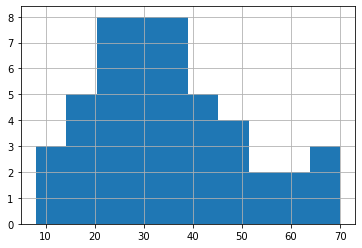

In [77]:
df.Midterm.hist()

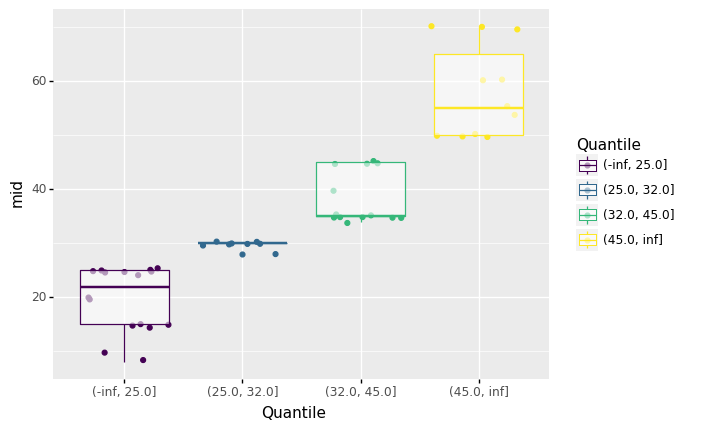

<ggplot: (8771153135945)>

In [71]:
ggplot(df.assign(Quantile=pd.cut(mid,[-np.inf,25,32,45,np.inf])))\
+geom_point(aes(x='Quantile',y='mid',color='Quantile'),position='jitter')\
+geom_boxplot(aes(x='Quantile',y='mid',color='Quantile'),alpha=0.6)